# Decision Tree Worksheet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)



# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)
data.head()

# Splitting data
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col],test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree_high_dep = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=100, min_samples_leaf=1)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree_high_dep.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=100)

Print accuracy of training and validation data.

In [ ]:
# Printing accuracy of testing & training data
y_train_pred=decision_tree_high_dep.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree_high_dep.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
tree_model = DecisionTreeClassifier(criterion="entropy", random_state = 0,
                               max_depth=5, min_samples_leaf=7)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7,
                       random_state=0)

Print accuracy of training and validation data.

In [ ]:
# Printing accuracy of testing & training data
y_train_pred=tree_model.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=tree_model.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  84.0
Validation Accuracy is  76.19047619047619


Explain the accuracy results below. 

With a high depth and low leaf minimum, the model overfits the dataset.

With a low depth and high leaf minimum, the model fits the dataset well. 

## Metrics

Plot the ROC curve and print the AUC of the second model.

In [ ]:
## YOUR CODE HERE



labels = [0,1]
y_val_prob = tree_model.predict_proba(X_val,labels)


# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)



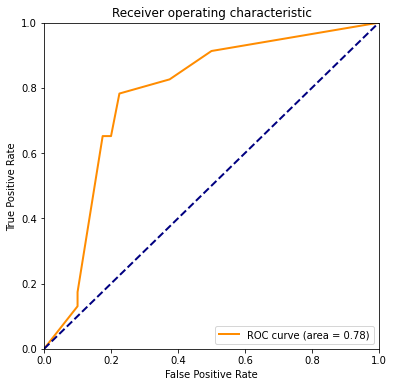

In [ ]:
## YOUR CODE HERE

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

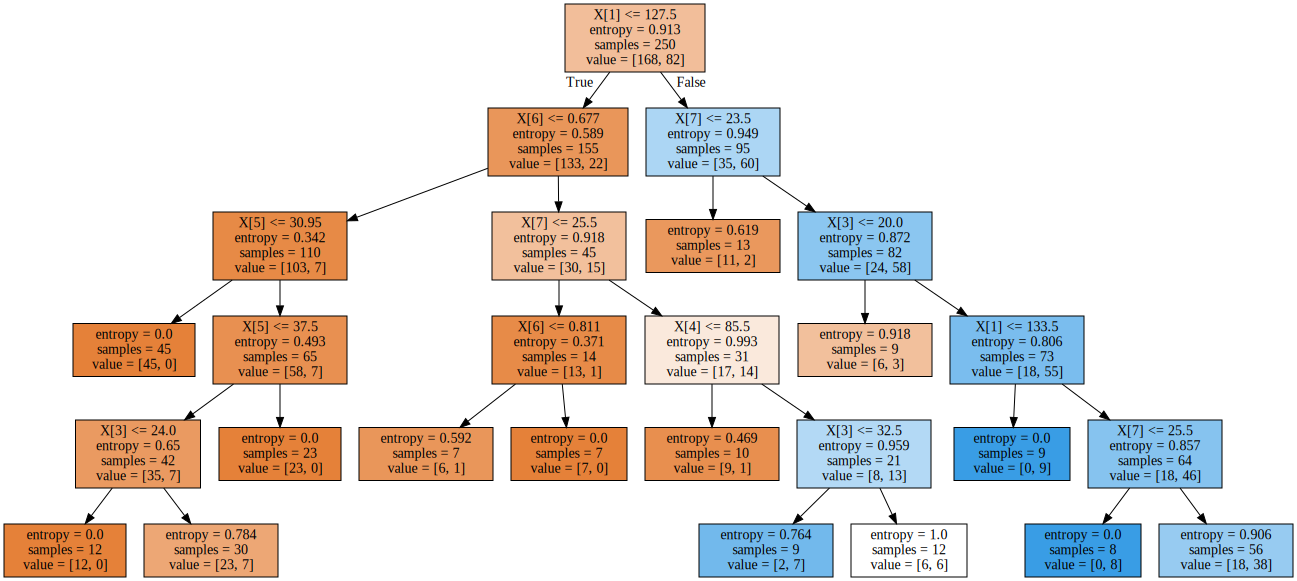

In [ ]:
dot_data = tree.export_graphviz(tree_model, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

It represents the true positive rate at the nth element in the tree

Question 2: What is the root feature? Does it make sense as the root feature?

X[1] <= 127.5, yes because you are comparing the x-values at the first n-value.

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?


The testing accuracy would be too high signaling that the model overfits the data. The training accuracy would be very close to the testing accuracy also signaling that the model overfits the data.

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
new_tree_model = DecisionTreeClassifier(criterion="entropy", random_state = 0,
                               max_depth=500, min_samples_leaf=1)
new_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=500, random_state=0)

In [ ]:
y_train_pred=new_tree_model.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=new_tree_model.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  80.95238095238095


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
# Creating a model w sklearn's RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

# Training/fitting the model with training data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

Print accuracy of training and validation data.

In [ ]:
# Printing accuracy of testing & training data
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  77.77777777777779


How did the accuracy compare to the decision tree's accuracy?

The forest's validaton accuracy is random. In this example, it is lower than the decision tree's validation acccuracy

The forest's training accuracy is consistently higher than the decision tree's training accuracy.

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
## YOUR CODE HERE
random_forest.feature_importances_
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']


array([0.0786141 , 0.22936579, 0.07737566, 0.08481372, 0.16645571,
       0.11112532, 0.11172835, 0.14052134])

The most important features in the decision tree are: plas,&nbsp;test, age.

Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937

Training Accuracy is  100.0
Validation Accuracy is  76.19047619047619

Training Accuracy is  100.0
Validation Accuracy is  77.77777777777779

Training Accuracy is  100.0
Validation Accuracy is  85.71428571428571

Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937

Training Accuracy is  100.0
Validation Accuracy is  76.19047619047619

Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937

Training Accuracy is  100.0
Validation Accuracy is  82.53968253968253

Training Accuracy is  100.0
Validation Accuracy is  77.77777777777779

Training Accuracy is  100.0
Validation Accuracy is  77.77777777777779

Training Accuracy is  100.0
Validation Accuracy is  73.01587301587301

Training Accuracy is  100.0
Validation Accuracy is  82.53968253968253

Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937

Training Accuracy is  100.0
Validation Accuracy is  84.12698412698413

Traini

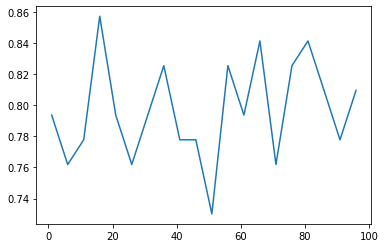

In [ ]:
## YOUR CODE HERE

xvals = []
yvals = []

for i in range(1, 100, 5):

    # Creating a model w sklearn's RandomForestClassifier
    random_forest1 = RandomForestClassifier(n_estimators=100)

    # Training/fitting the model with training data
    random_forest1.fit(X_train, y_train)

    # Printing accuracy of testing & training data
    y_train_pred=random_forest1.predict(X_train)
    print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)


    y_val_pred=random_forest1.predict(X_val)
    print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)
    yvals.append(accuracy_score(y_val,y_val_pred))
    
    xvals.append(i)

    print()


plt.plot(xvals, yvals)

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

In [ ]:
## YOUR CODE HERE

labels = [0,1]
y_val_prob = random_forest.predict_proba(X_val)


# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

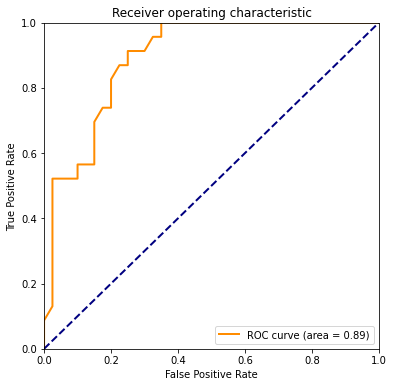

In [ ]:
## YOUR CODE HERE

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87ac0e45-1ead-4d49-81f5-83b26292767f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>